# ECG Motifs - Annotation Vectors

Annotation vectors are a series of numbers in the range [0, 1] which correspond to how significant a motif is at that index. For example, a 1 in the AV means that any motif starting at that index is heavily important and should be conserved whereas a 0 means that the motif can be discarded or ignored. As a result, annotation vectors allow you to ignore stop words or insigificant patterns in your data. This example shows you the basics of using annotation vectors on real-world data to select for specific motifs or patterns.

## Data Overview

The data is a snippet from a large collection of ECG heartbeat data from the LTAF-71 database. The first half of this time series contains the calibration signal whereas the second half contains the actual ECG heartbeat.

In [1]:
import matrixprofile as mp
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ecg = mp.datasets.load('ecg-heartbeat-av')
ts = ecg['data']
window_size = 150

## Motifs with Matrix Profile

Let's compute the regular matrix profile and use that to find our top motif.

In [3]:
profile = mp.compute(ts, windows=window_size)
profile = mp.discover.motifs(profile, k=1)

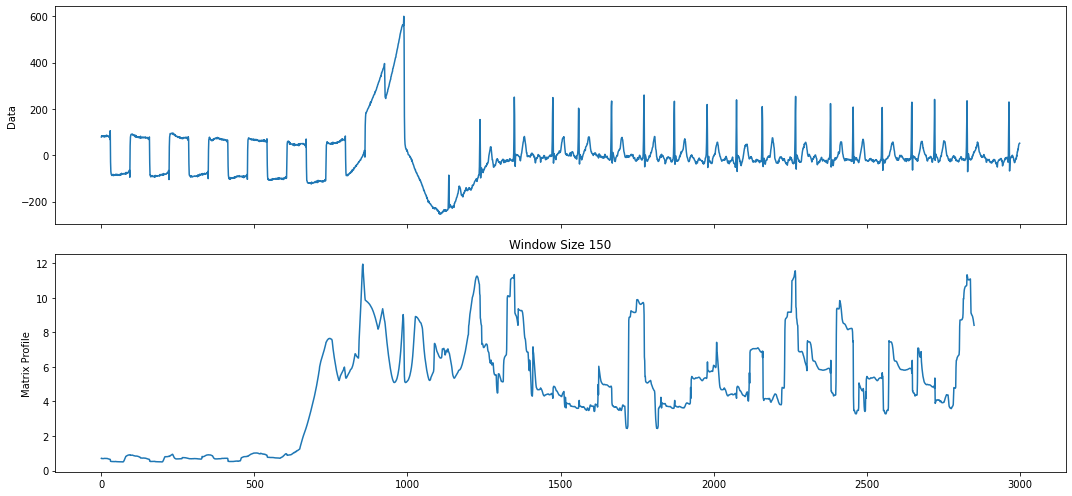

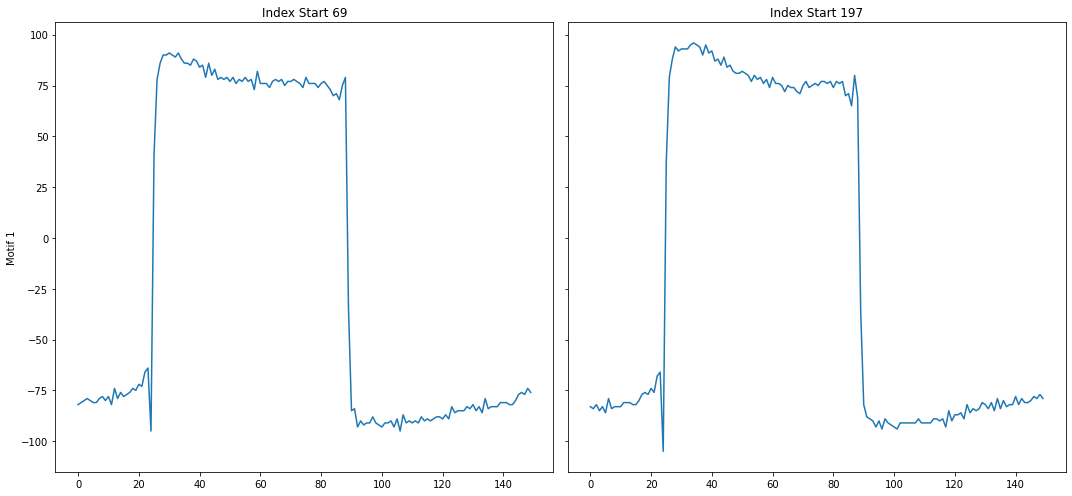

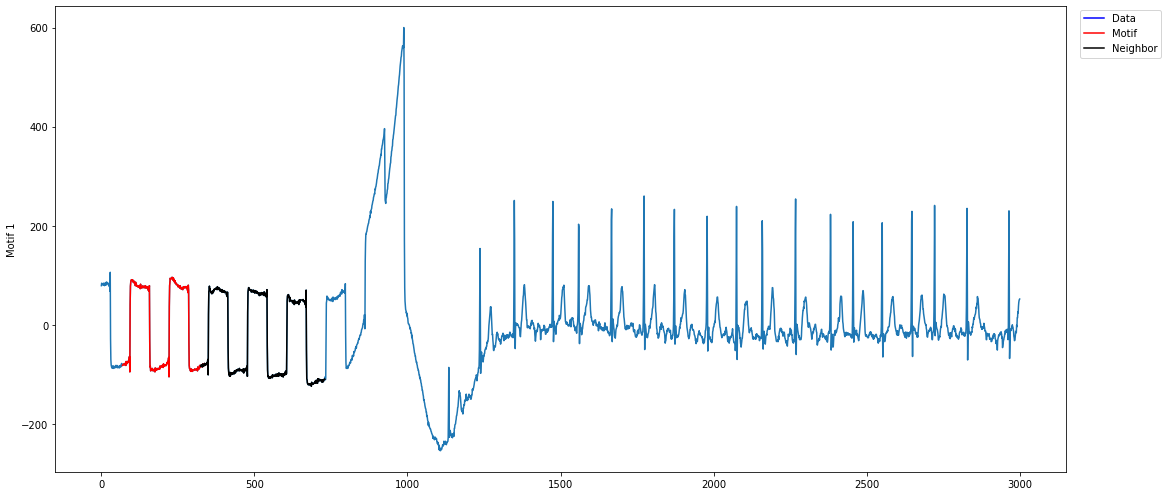

In [4]:
figures = mp.visualize(profile)

As can be seen above, the top motif is the calibration signal. The reason why is because the calibration signal is more well-conserved than the heartbeat signal, which may have variance due to the slight irregularity of a heartbeat. However, since we have the domain-specific knowledge that the calibration signal should be ignored, we can use annotation vectors to help us discard the calibration signal motif.

In [5]:
# note the calibration signal starts to fade after the 1200th data point
threshold = 1200

# fill in first 1200 data points with 0s and rest with 1s to indicate
# that the calibration signal is not as important as heartbeat
av = np.append(np.zeros(threshold), np.ones(len(profile['mp']) - threshold))

## Motifs with Corrected Matrix Profile

Now we can apply the AV that we created to our original matrix profile and get a "corrected" matrix profile, or CMP. We can then use this CMP to re-discover the top motif.

In [6]:
profile = mp.transform.apply_av(profile, "custom", av)
profile = mp.discover.motifs(profile, k=1, use_cmp=True)

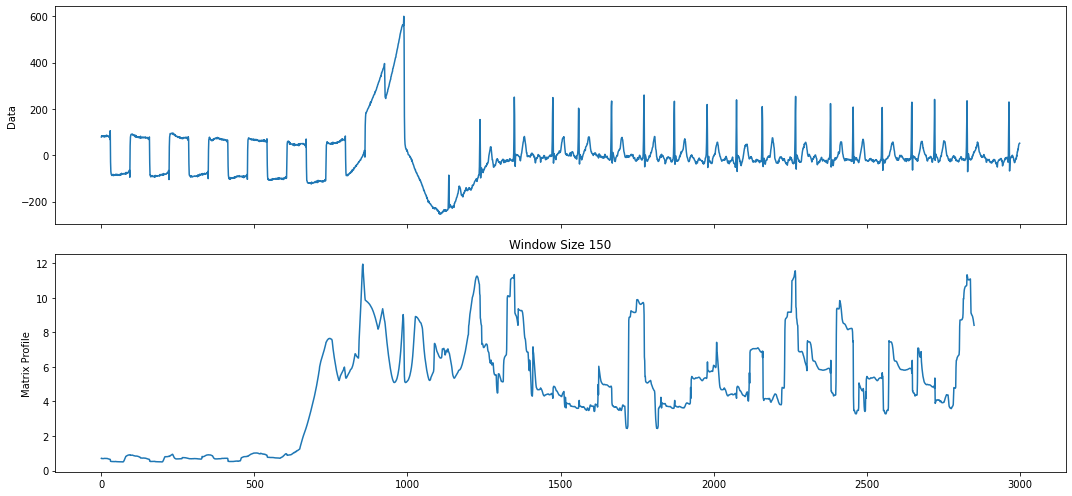

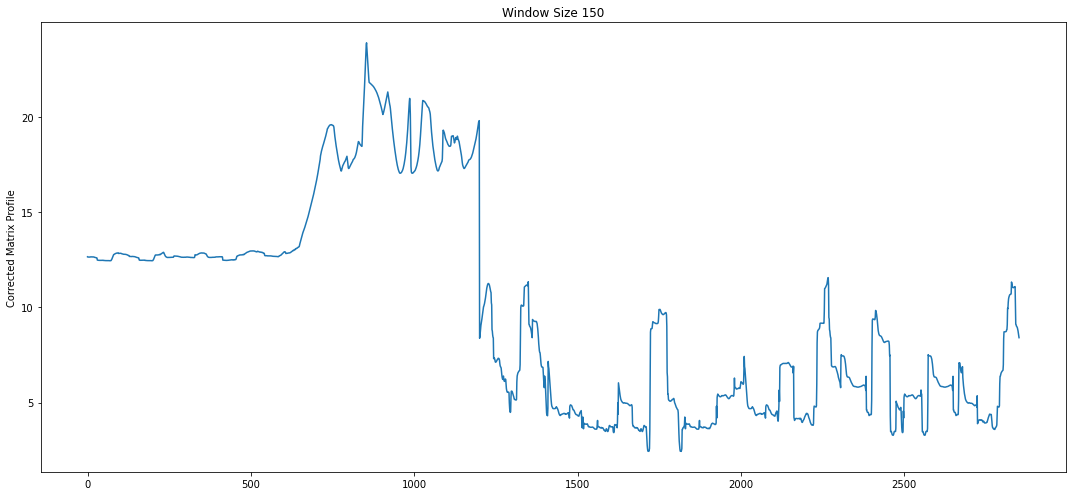

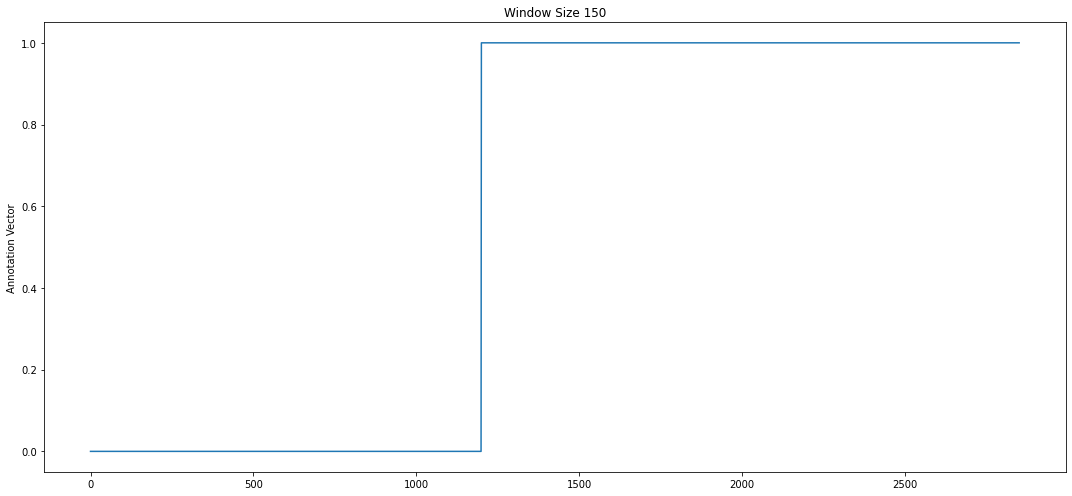

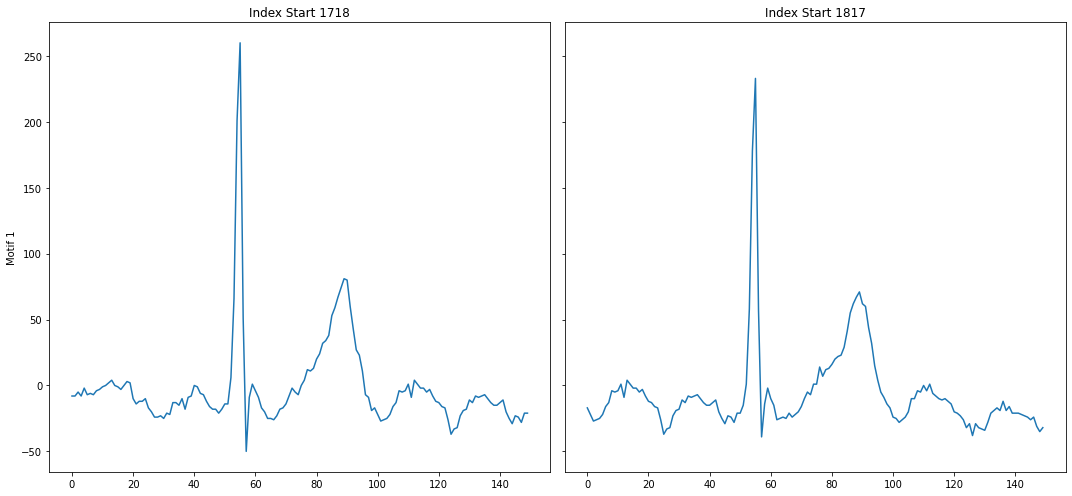

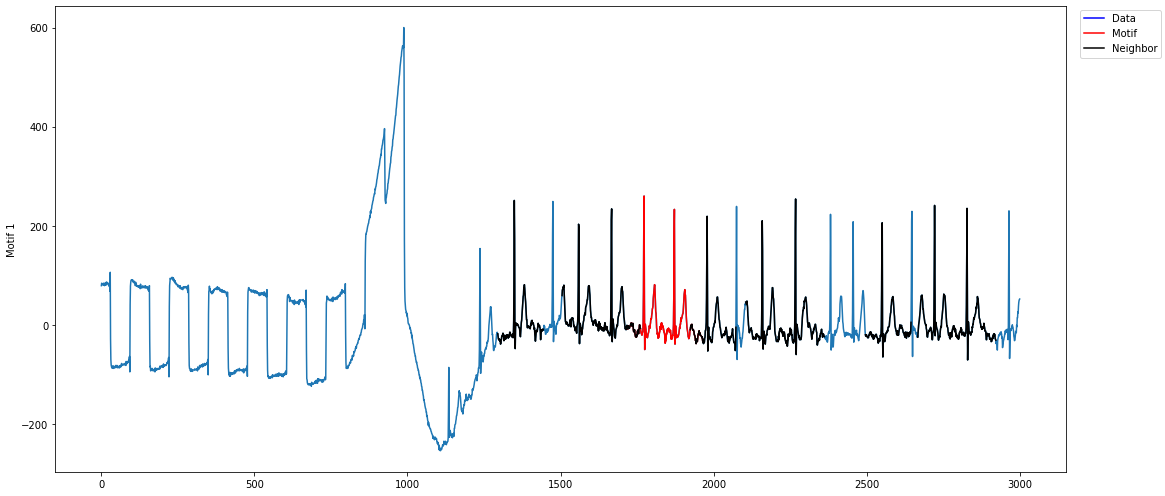

In [7]:
figures = mp.visualize(profile)

Note how the top motif is now the heartbeat motif, which is the one we wanted to select. With domain-specific knowledge about the time series you are analyzing, annotation vectors can be an important tool in selecting for motifs that are important and ignoring motifs that are irrelevant.